 **绑定google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/baby_sound

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/baby_sound


查看当前文件夹

In [ ]:
from pathlib import Path
print(Path.cwd())
!ls

In [ ]:
Base_Filepath="./work/"

#一些样例

测试处理音频的一些包

In [ ]:
!pip install ffmpy3

In [ ]:
from ffmpy3 import FFmpeg
ff = FFmpeg(inputs={'durationTime6921.wav': None},
            outputs={'durationTime6921-3.wav': None})
print(ff.cmd)
ff.run()

ModuleNotFoundError: ignored

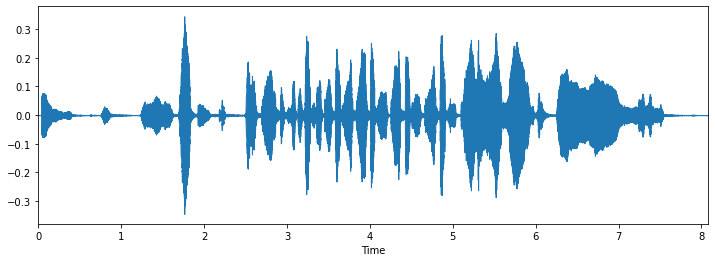

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import os

# Class: aw、ake
filename = Base_Filepath+'test/test_212.wav'
# filename = 'durationTime6921.wav'

plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename,sr=22050)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
print(librosa.__version__)

0.8.1


**公共函数  变量保存至本地**

In [ ]:
import pickle
def save_variable(v,filename):
  f=open(filename,'wb')
  pickle.dump(v,f)
  f.close()
  return filename
 
def load_variavle(filename):
  f=open(filename,'rb')
  r=pickle.load(f)
  f.close()
  return r
# filename = save_variable(audiodf,'audiodf.txt')
# audiodf = load_variavle('audiodf.txt')

#Audio sample file properties**

In [ ]:
import struct

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

**数据转换：获取数据、变换轨道、变换频率、变换xx**

In [ ]:
# Load various imports 
import pandas as pd
import os
import librosa
import librosa.display
import tensorflow as tf

wavfilehelper = WavFileHelper()
audiodata = []
#获取文件分类列表 
class_name_arr = tf.io.gfile.listdir(Base_Filepath+'train')
#  ['hug', 'sleepy', 'awake', 'hungry', 'diaper', 'uncomfortable']
for sigle_filename in class_name_arr:
  #获取文件目录下的文件列表
  # print(Base_Filepath+'train/'+sigle_filename)
  doc_name_arr = tf.io.gfile.listdir(Base_Filepath+'train/'+sigle_filename)
  for doc_name_item in doc_name_arr:
    # temp_filepath = os.path.join(os.path.abspath(Base_Filepath),'train/'+sigle_filename+'/',doc_name_item)
    temp_filepath = Base_Filepath+'train/'+sigle_filename+'/'+doc_name_item
    print(temp_filepath)
    data = wavfilehelper.read_file_properties(temp_filepath)
    audiodata.append(data)
# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])
#数据存储
save_variable(audiodf,'audiodf_split.txt')

In [ ]:
audiodf = load_variavle('audiodf_split.txt')

**将单声道音频转换为立体声音频 **

In [ ]:
# num of channels 

print(audiodf.num_channels.value_counts(normalize=True))

1    1.0
Name: num_channels, dtype: float64


In [ ]:
# sample rates 

print(audiodf.sample_rate.value_counts(normalize=True))

16000    0.802650
44100    0.186386
1600     0.010964
Name: sample_rate, dtype: float64


In [ ]:
# bit depth

print(audiodf.bit_depth.value_counts(normalize=True))

16    1.0
Name: bit_depth, dtype: float64


**Data PreProcessing and Data Splitting**
数据  预处理 与 拆分

In [ ]:
from scipy.io import wavfile as wav
import numpy as np
import librosa

# filename = './UrbanSound8K/audio/fold1/24074-1-0-7.wav' 
filename = Base_Filepath+'train/hug/hug_138_3_1.wav'
librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename) 

print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate) 

Original sample rate: 16000
Librosa sample rate: 22050


Here librosa convert audio to 22.05 KHz Sample

**这里 librosa 将音频转换为 22.05 KHz 示例**

Original audio file min~max range: -25791 to 31844
Librosa audio file min~max range: -0.46381214 to 0.52137864

In [ ]:
import numpy as np
print('Original audio file min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Original audio file min~max range: -32408 to 31385
Librosa audio file min~max range: -0.9930845 to 0.9675757


**Bit Depth**

This is to remove the complication because librosa function load audio in values range between -1 and 1. This is Normalization

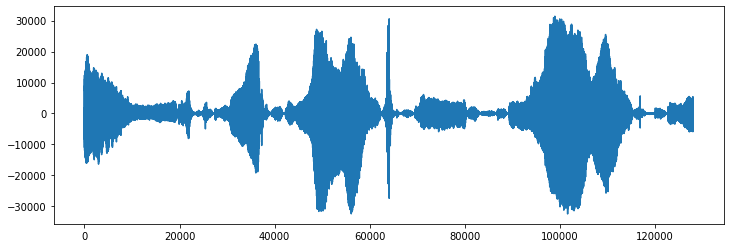

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

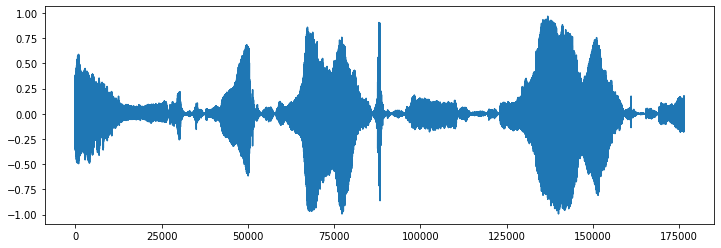

In [ ]:
# Librosa audio with channels merged 
# 通道合并
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio)

Librosa 的 mfcc() 函数从时间序列音频数据生成 MFCC

MFCCs是一个在语音识别和说话者识别领域被广泛运用的特征

(40, 345)


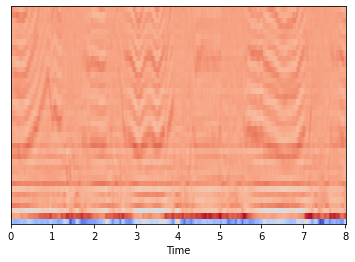

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)#n_mfcc=40   可能是横轴时间的长度
print(mfccs.shape)
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

**获取梅尔谱图**

In [ ]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccsscaled

#接下来，我们将遍历每个音频样本文件并提取音频通道数、采样率和位深度。

Bit depth refers to the `color information stored` in an image. `The higher the bit depth of an image, the more colors it can store`. The simplest image, a 1 bit image, can only show two colors, black and white. That is because the 1 bit can only store one of two values, 0 (white) and 1 (black). An 8 bit image can store 256 possible colors, while a 24 bit image can display over 16 million colors. As the bit depth increases, the file size of the image also increases because more color information has to be stored for each pixel in the image.

standard sample rate used for audio CDs is` 44.1 kilohertz` (44,100 hertz).

An audio file can contain `one, two or even more Channels.` Especially in the case of surround sound, more audio Channels are needed to create the feeling of sound being

In [ ]:
# Load various imports 
import pandas as pd
import os
import librosa
import librosa.display
import tensorflow as tf

wavfilehelper = WavFileHelper()
features = []
#获取文件分类列表 ['hug', 'sleepy', 'awake', 'hungry', 'diaper', 'uncomfortable']
class_name_arr = tf.io.gfile.listdir(Base_Filepath+'train')
for sigle_filename in class_name_arr:
  #获取文件目录下的文件列表
  # print(Base_Filepath+'train/'+sigle_filename)
  doc_name_arr = tf.io.gfile.listdir(Base_Filepath+'train/'+sigle_filename)
  for doc_name_item in doc_name_arr:
    # temp_filepath = os.path.join(os.path.abspath(Base_Filepath),'train/'+sigle_filename+'/',doc_name_item)
    temp_filepath = Base_Filepath+'train/'+sigle_filename+'/'+doc_name_item
    print(temp_filepath)
    class_label = sigle_filename
    data = extract_features(temp_filepath)
    features.append([data, class_label])
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])
#保存变量
save_variable(featuresdf,'featuresdf_split.txt')
print('Finished feature extraction from ', len(featuresdf), ' files') 
#获取变量值
# audiodf = load_variavle('audiodf.txt')

In [ ]:
#获取变量值
featuresdf = load_variavle('featuresdf_split.txt')

**转换数据和标签**
Convert the data and labels

will use `sklearn.preprocessing.LabelEncoder` to encode the categorical text data into model-understandable numerical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

# split the dataset 

In [ ]:
# split the dataset 
# 分割数据
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

#创建模型


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

#加载模型

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('saved_models/baby_sound.h5')

# Show the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 6)                 1

# Compile the model

编译模型

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

**Display model architecture summary** 

打印模型结构

In [ ]:
model.summary()

# Calculate pre-training accuracy 
#计算预训练准确率   评估
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 6)                 1

**开训  model.fit()**

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 2000
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp_dnn_split_inUnsplitDnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start

model.save('saved_models/baby_sound_dnn_split_inUnsplitDnn.h5')
print("Training completed in time: ", duration)

**# Evaluating the model on the training and testing set**

In [ ]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.7772701382637024
Testing Accuracy:  0.767123281955719


**系统关闭**

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
# 提炼 mfccs  特征的图
def extract_feature(file_name):
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None, None
    return np.array([mfccsscaled])

In [ ]:
# 打印预测
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 
    # print(prediction_feature)
    predict_x=model.predict(prediction_feature) 
    # print(predict_x)
    classes_x=np.argmax(predict_x,axis=1)
    # print(classes_x)
    # predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(classes_x) 
    # print(classes_x)
    # print(predicted_class)
    # print("The predicted class is:", predicted_class[0], '\n') 
    return classes_x[0]
    # predicted_proba_vector = model.predict_proba(prediction_feature) 
    # predicted_proba = predicted_proba_vector[0]
    # for i in range(len(predicted_proba)): 
    #     category = le.inverse_transform(np.array([i]))
    #     print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [ ]:
# Class: predict
filename = Base_Filepath+'train/awake/awake_28_3_2.wav'
# filename = Base_Filepath+'test/test_0.wav'
# filename ='test_test.wav'
# filename ='durationTime2791.wav'
# filename ='durationTime6921.wav'

print_prediction(filename)

0

In [ ]:
filename = Base_Filepath+'test/test_212.wav'
print_prediction(filename)

In [ ]:
# Class: predict
class_name_arr = tf.io.gfile.listdir(Base_Filepath+'test')
# filename = './UrbanSound8K/audio/fold1/24074-1-0-7.wav' 
filename = Base_Filepath+'test/'+class_name_arr[2]

print_prediction(filename)


#测试集相关函数


In [ ]:
def judgelabel(labelname):
  if labelname=='sleepy':
    return 4
  elif labelname=='hug':
    return 2
  elif labelname=='uncomfortable':
    return 5
  elif labelname=='diaper':
    return 1
  elif labelname=='awake':
    return 0
  elif labelname=='hungry':
    return 3

In [ ]:
import tensorflow as tf

test_file = "./work.zip (Unzipped Files)/work/train"
class_name_arr = tf.io.gfile.listdir(test_file)
print(class_name_arr)
right_item_num = 0
wrong_item_num = 0
for index,sigle_filename in enumerate(class_name_arr):
    # print(str(index) +"handling...")
    #获取文件目录下的文件列表 并转换文件形式
    doc_name_arr = tf.io.gfile.listdir(test_file+'/'+sigle_filename)
    temp_label_index = judgelabel(sigle_filename)
    # print(temp_label_index)
    #处理每个单独的音频元素
    for doc_name_item in doc_name_arr:
      predict_label_index = print_prediction(test_file+'/'+sigle_filename+'/'+doc_name_item)
      if predict_label_index==temp_label_index:
        right_item_num+=1
      else:
        wrong_item_num+=1
      # print(test_file+'/'+sigle_filename+'/'+doc_name_item)
print(right_item_num)
print(wrong_item_num)
print(right_item_num/(right_item_num+wrong_item_num))

['awake', 'diaper', 'hug', 'uncomfortable', 'sleepy', 'hungry']
240
54
0.8163265306122449
